<a href="https://colab.research.google.com/github/josevlal/CapstoneF21_MovieReviewClassification/blob/main/Sentiment_Analysis_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from numpy.lib.utils import info
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import freqdist
from yellowbrick.datasets import load_hobbies
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


# Load the text data
df = pd.read_csv("IMDB Dataset.csv")

print(df.head())

#Total number of positive and negative sentiments reviews in the dataset:
print(df.sentiment.value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
positive    25000
negative    25000
Name: sentiment, dtype: int64


In [2]:
#--------------------Pre-processing--------------------#

#Make lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove the line break character from text
df['review'] = df['review'].str.replace("<br />",'')

#Remove other characters
df['review'] = df['review'].str.replace('[^\w\s]','')

#Pre-processed data:
print(df.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6bf6720d0>,
                    color=None,
                    features=['00', '000', '0000000000001', '00000001',
                              '000001', '00015', '001', '0010', '002', '0069',
                              '007', '009', '00s', '01', '010', '01000', '0101',
                              '010objectionable', '010ps', '0110', '0130', '02',
                              '0205', '0210', '0230', '029', '02i', '0310',
                              '03oct2009', '04', ...],
                    n=None, orient='v')

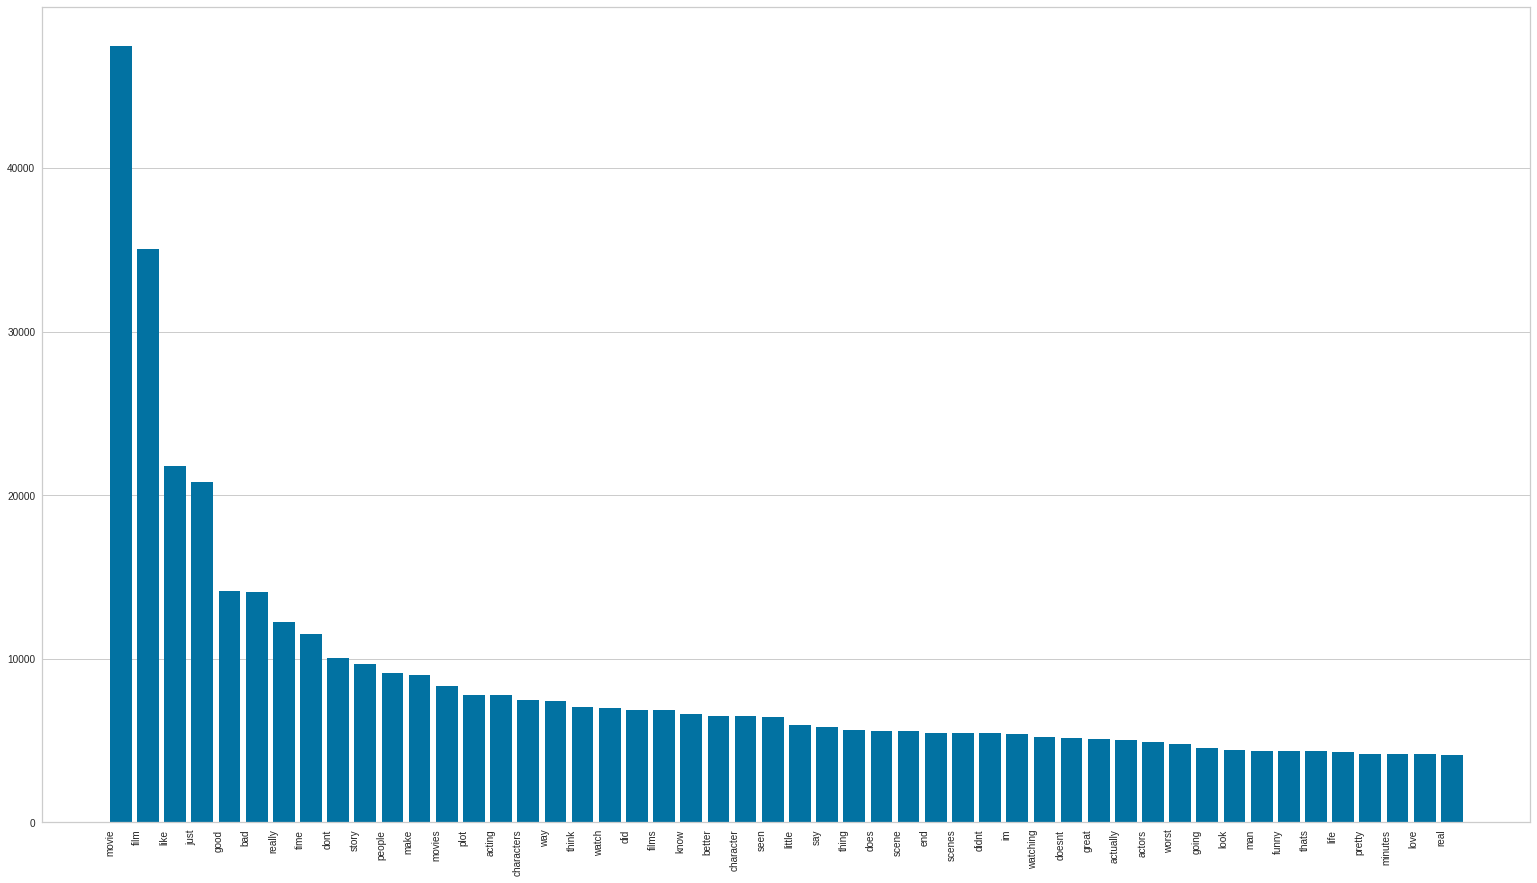

In [5]:
#--------------------Tokens--------------------#

#Features/ negative tokens

vectorizer = CountVectorizer(stop_words='english')

df_neg = df[df['sentiment'] == "negative"]

docs_neg = vectorizer.fit_transform(df_neg['review'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, size = (1920, 1080), orient='v')
visualizer.fit(docs_neg)
# visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6beb0d5d0>,
                    color=None,
                    features=['00', '0001', '002', '00383042', '006', '007',
                              '0079', '007s', '007the', '0080', '0083',
                              '00agent', '00s', '00schneider', '01', '010',
                              '010606', '010707', '010guinea', '010overall',
                              '012310', '0126', '013007', '02', '03', '030',
                              '03092005', '039', '04', '04082007', ...],
                    n=None, orient='v')

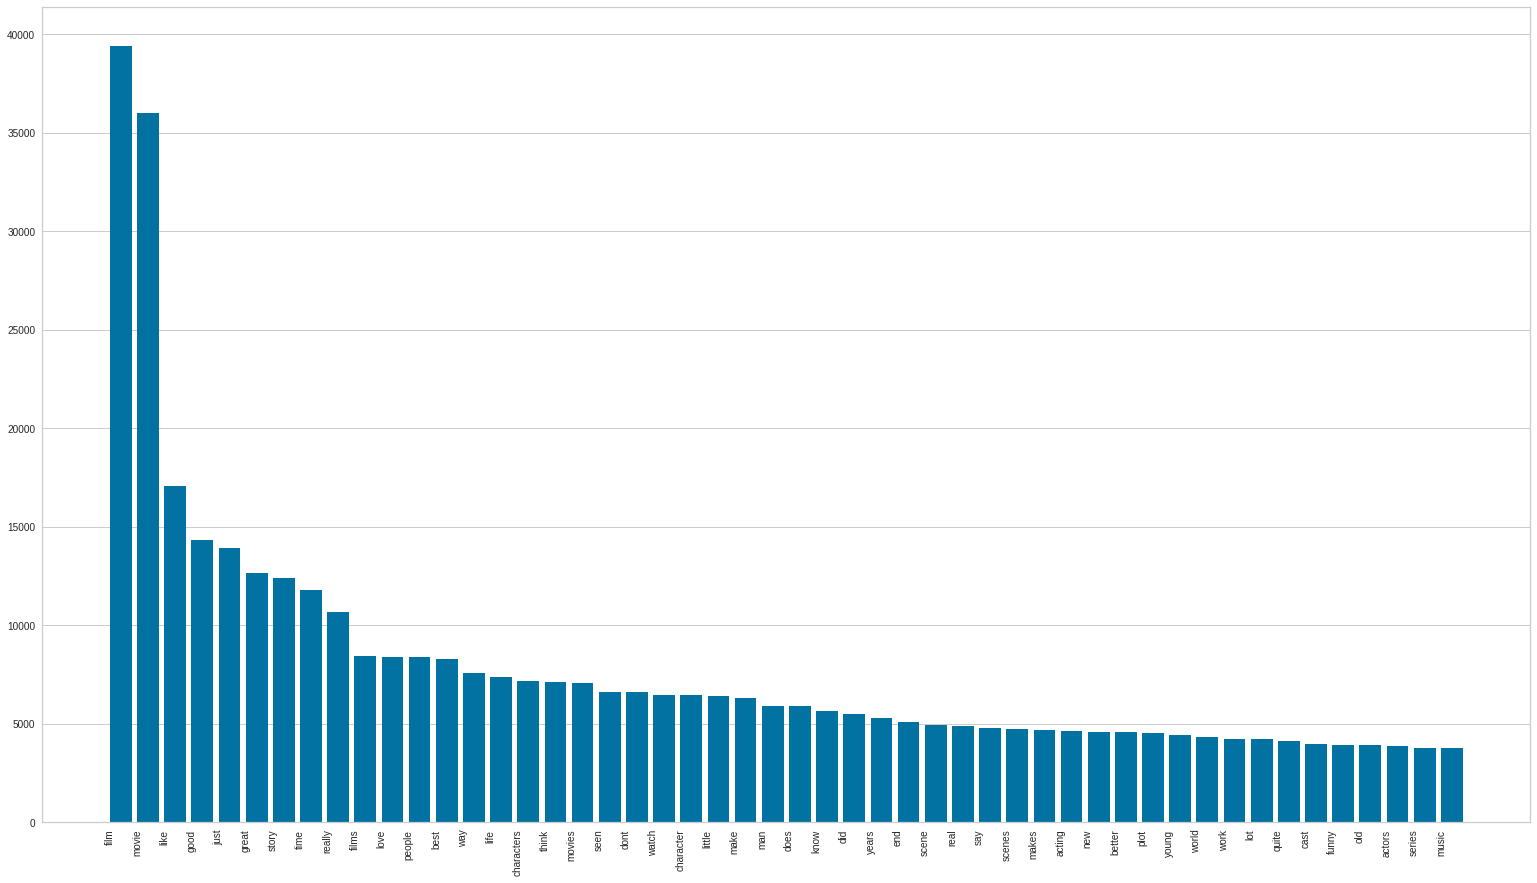

In [6]:
#--------------------Tokens--------------------#

#Features/ Positive tokens

vectorizer = CountVectorizer(stop_words='english')

df_pos = df[df['sentiment'] == "positive"]

docs_pos = vectorizer.fit_transform(df_pos['review'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, size = (1920, 1080), orient='v')
visualizer.fit(docs_pos)

In [22]:
#--------------------Tokens--------------------#

vectorizer = CountVectorizer(stop_words='english')

docs_n      = vectorizer.fit_transform(df_neg['review'])
features   = vectorizer.get_feature_names()

tokens_n = pd.DataFrame({'features': features})

docs_p      = vectorizer.fit_transform(df_pos['review'])
features   = vectorizer.get_feature_names()

tokens_p = pd.DataFrame({'features': features})

df_new = pd.DataFrame({'Overlap_tokens': list(set(tokens_n.features) & set(tokens_p.features))})

#Tokens Summarized:
print(tokens_p)
print(tokens_n)
print(df_new)

          features
0               00
1             0001
2              002
3         00383042
4              006
...            ...
141466    übervamp
141467        ünel
141468  ünfaithful
141469          ýs
141470         þór

[141471 rows x 1 columns]
             features
0                  00
1                 000
2       0000000000001
3            00000001
4              000001
...               ...
138252     üvegtigris
138253         üzümcü
138254    þorleifsson
138255           יגאל
138256          כרמון

[138257 rows x 1 columns]
      Overlap_tokens
0            belongs
1             region
2       instrumental
3         wealthiest
4            blended
...              ...
57988         slants
57989     exhausting
57990         senior
57991          conte
57992         sitges

[57993 rows x 1 columns]


In [17]:
#--------------------Bag_of_Words--------------------#
#tokenized similar to above, for the bag of words upto bigrams are considered

tokens = RegexpTokenizer('[a-zA-Z0-9]+')
token_doc = CountVectorizer(stop_words='english', ngram_range=(2,2), tokenizer=tokens.tokenize)
token_count = token_doc.fit_transform(df['review'])

In [18]:
#--------------------Train_Test_split--------------------#

X_train, X_test, Y_train, Y_test = train_test_split(token_count, df['sentiment'], test_size = 0.25, random_state=5)

#--------------------Fitting_the_model--------------------#

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
#--------------------Evalutating_the_model--------------------#

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicted)

#Confusion Matrix
print(conf_mat)

#Accuracy
print("Accuracy:", str('{:04.2f}'.format(accuracy_score*100))+'%')

[[5643  506]
 [1068 5283]]
Accuracy: 87.41%
